In [3]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

In [10]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_null
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.771044
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
df.isnull().sum()
#Titanic data is collected after incidence so age and cabin of people who died could be missing 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Embarked is missing completely at random (MCAR)
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [14]:
#Embarked is missing completely at random (MCAR)
#A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [15]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [35]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end               object
rate                  float64
dtype: object

# Here it can be seen 87% of people who died there cabin number is missing so its Missing Data Not At Random(MNAR): Systematic missing Values

In [16]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [23]:
df['age_null']=np.where(df['Age'].isnull(),1,0)

##find the percentage of null values
df['age_null'].mean()

0.19865319865319866

In [24]:
df.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

# Missing At Random (MAR)
MAR data means that the reason for missing values can be explained by variables on which you have complete information, as there is some relationship between the missing data and other values/data.

# All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [85]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived','Sex'])
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [86]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Sex         0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [87]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\saad4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


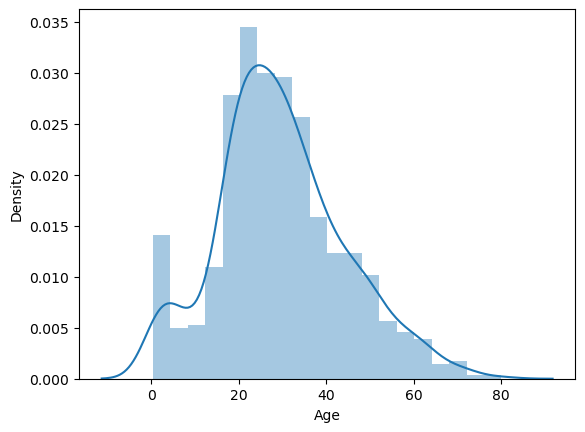

0.38910778230082704

In [88]:
sns.distplot(df['Age'])
plt.show() 
df["Age"].skew()


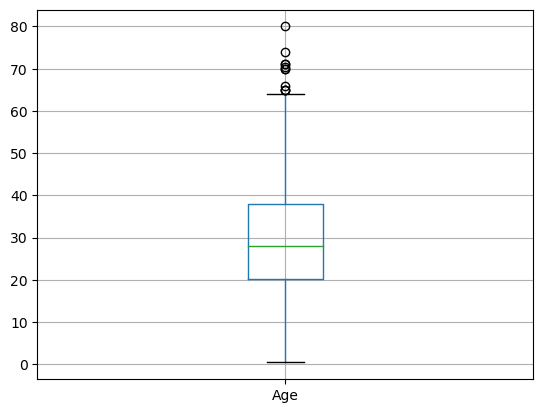

In [89]:
df.boxplot(column='Age', return_type='axes');

In [90]:
#As there are outliers and and skewness we should meadian instead of mean
df['Age'].median()
df['Age_Median']= df['Age'].fillna(df['Age'].median())


In [91]:
df.isnull().sum()

Survived        0
Sex             0
Age           177
Fare            0
Age_Median      0
dtype: int64

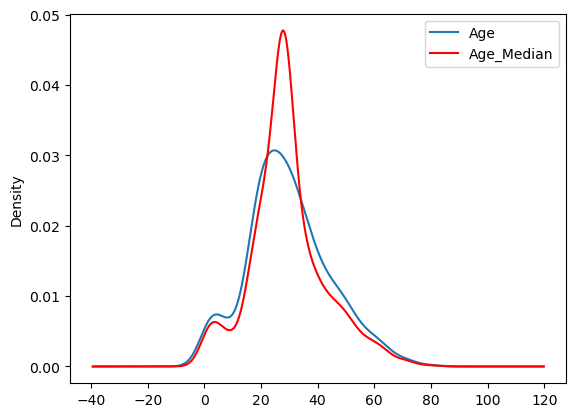

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_Median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [93]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [94]:
df['Age'].dropna().sample()

707    42.0
Name: Age, dtype: float64

In [95]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [96]:
median=df.Age.median()
impute_nan(df,"Age",median)

In [97]:
df.head()

,Survived,Sex,Age,Fare,Age_Median,Age_median,Age_random
0,0,male,22.0,7.2500,22.0,22.0,22.0
1,1,female,38.0,71.2833,38.0,38.0,38.0
2,1,female,26.0,7.9250,26.0,26.0,26.0
3,1,female,35.0,53.1000,35.0,35.0,35.0
4,0,male,35.0,8.0500,35.0,35.0,35.0


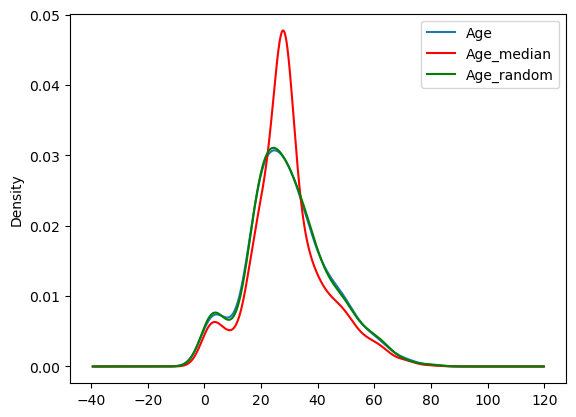

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
#df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [105]:
df.groupby(['Sex'])['Age'].mean()
df['Age_subgroup'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

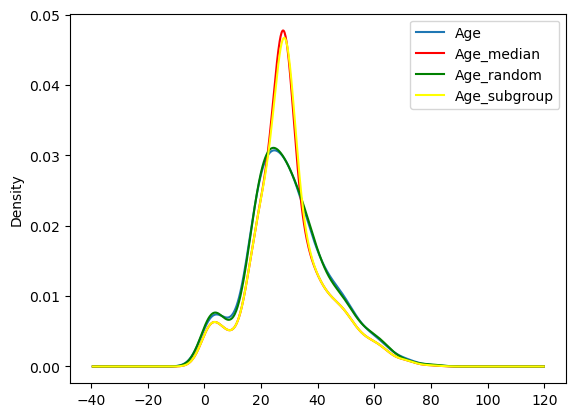

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
df.Age_subgroup.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [111]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [112]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution imputation

In [113]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

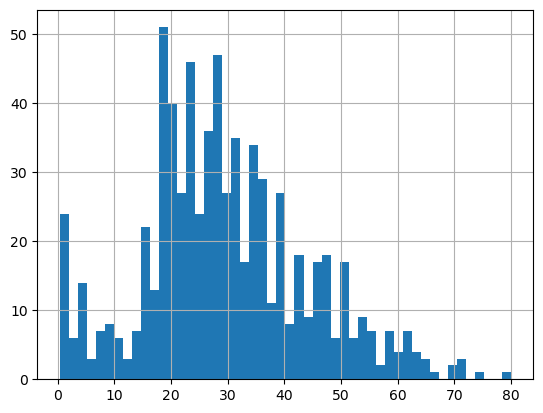

In [114]:
df.Age.hist(bins=50)

C:\Users\saad4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

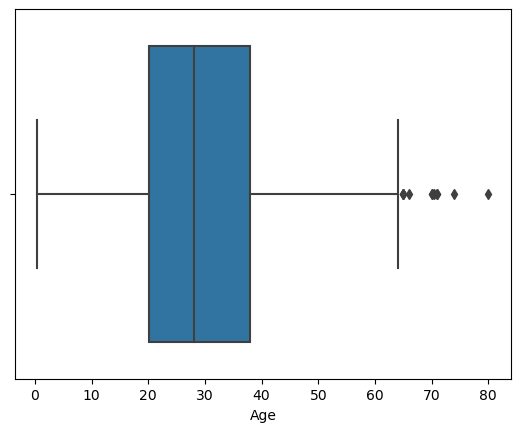

In [116]:
extreme=df.Age.mean()+3*df.Age.std()
sns.boxplot('Age',data=df)

In [117]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [118]:
impute_nan(df,'Age',df.Age.median(),extreme)

<AxesSubplot:>

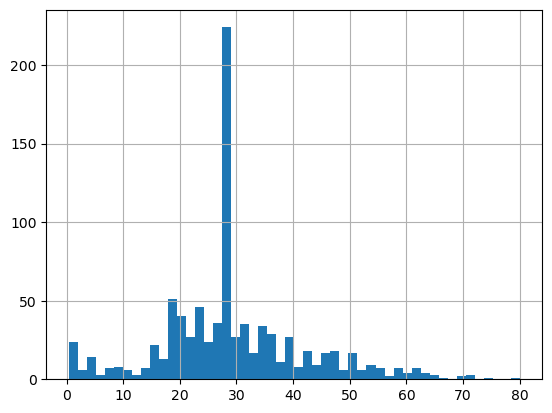

In [119]:

df['Age'].hist(bins=50)

<AxesSubplot:>

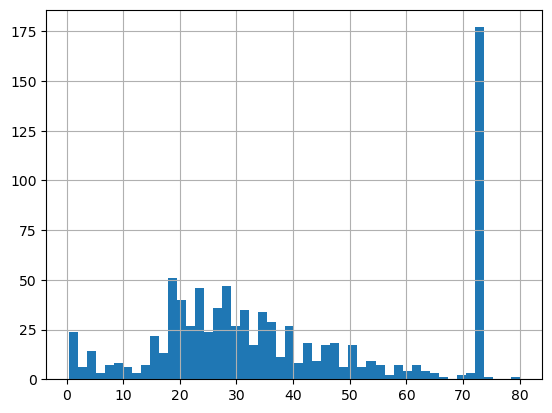

In [120]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\saad4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

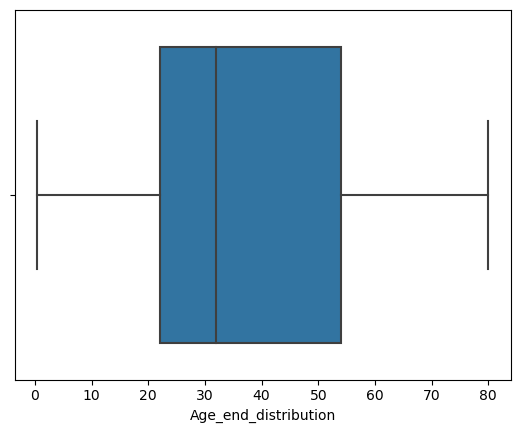

In [121]:

sns.boxplot('Age_end_distribution',data=df)

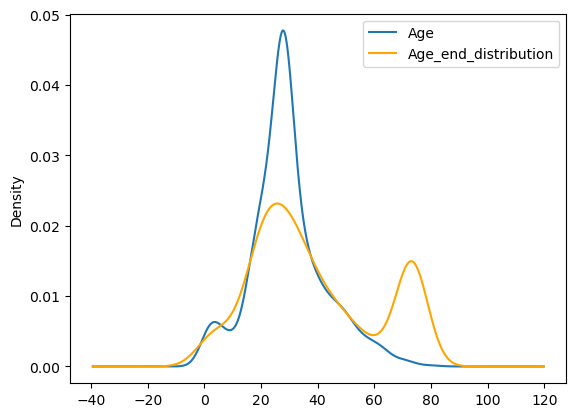

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_end_distribution.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value
Arbitrary value should not be frequent

In [126]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [127]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

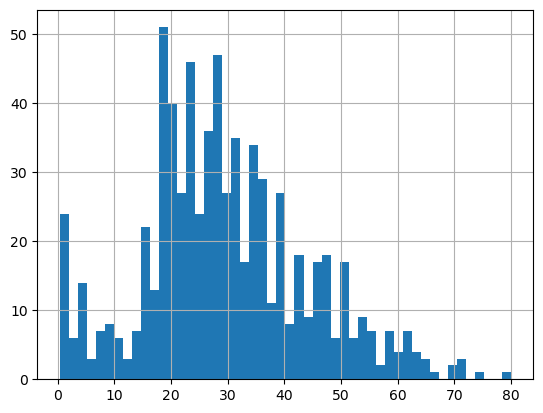

In [128]:
df['Age'].hist(bins=50)